# Basic and Intermediate Python

**Author**: Christian Jauregui<br/>
**Contact**: chris.jauregui@berkeley.edu

Below is an outline of the topics discuss here:

**0.** Jupyter Notebooks <br>
**1.** Objects and Methods <br>
**2.** Packages <br>
**3.** Lists and NumPy <br>
**4.** Matplotlib <br>
**5.** Dictionaries <br>
**6.** Pandas <br>
**7.** Comparison Operators <br>
**8.** Conditional Statements:  `if`, `elif`, and `else` <br>
**9.** Filtering DataFrames <br>
**10.** The `while` loop <br>
**11.** The `for` loop <br>
**12.** Importing, Exporting, and Plotting with pandas and DataFrames <br>
**13.** Simulating a Random Walk <br>
**14.** Debugging <br>


# 0. Jupyter Notebooks

If you are using Jupyter notebooks and "markdown" to write notes outside of Python code (as I will below), definitely install a [popular bundle](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) that contains a spell checker for Jupyter notebooks:

`!pip install jupyter_contrib_nbextensions` <br>
`!jupyter contrib nbextension install --user` <br>
`!jupyter nbextension enable spellchecker/main` <br>

To enable this extension on all notebooks, simply execute the code

`!jupyter nbextension enable --py githubcommit` <br>

This bundle provides one of the most popular spell checkers for Jupyter Notebooks. However, it simply highlights words not in its dictionary, and does not offer corrections.

# 1. Objects and Methods

**FACT 1:** In Python, everything is a type of **object** and each object has "methods" associated with it. 
The methods depend on the object type. 

Methods: call functions *on* objects.

**FACT 2:** Some object types may have the same "method". For example:

In [1]:
list1 = ['a', 'b', 'c', 'd']
string1 = "hello"

In [2]:
list1.index('b')

1

In [3]:
string1.index('o')

4

In the code above, `list1` and `string1` both have the `index` method. However, this method does different things.  

The way we call methods depend on how they are constructed. For example, for strings like `string1` the `len` method is defined as
* `__len__(self, /)` 
which means you call it as:

In [4]:
len(string1)

5

while the method `capitalize(...)` is called as:

In [5]:
string1.capitalize()

'Hello'

# 2. Packages

When importing a package, you can rename it with shorter names. For example, when importing `numpy`, you can do this:
* <code><strong>import</strong> numpy</code>
or 
* <code><strong>import</strong> numpy <strong>as</strong> np</code>

If you want to import a subpackage of a package, like the `linalg` subpackage of the `scipy` package, you use the notation `scipy.linalg`. If you want to import the function `inv()` as `my_inv` then you type the following:
* <code><strong>from</strong> scipy.linalg <strong>import</strong> inv <strong>as</strong> my_inv<code> 

# 3. Lists and NumPy

The `list` object is very powerful. It can hold different object types. You can change, add, and remove elements from a list. 

However, to perform mathematical operations on elements of a list, it is not possible to do this efficiently. This is where the `NumPy` array object comes in handy! The `NumPy` array is an alternative to Python lists and allows for calculations over entire arrays. It is easy and fast. 

### 3.1 2D NumPy Arrays

If we have a list of 2 lists, we can convert this to a 2D `numpy` array. In general, a list of $n$ lists can be converted to an $n$-d `numpy` array. 

Subsetting in a 2D `numpy` array is easy. See the following:

In [6]:
import numpy as np
list1 = [[1.73, 1.68, 1.71, 1.89, 1.79], [65.4, 59.2, 63.6, 88.4, 68.7]]

np_2d = np.array(list1)
np_2d[0]

array([1.73, 1.68, 1.71, 1.89, 1.79])

In [7]:
# To get the element in 1st row, 2nd column. 
# Method 1:
np_2d[0][2]

1.71

In [8]:
# Method 2:
np_2d[0,2]

1.71

### 3.2 NumPy Arrays: Basic Statistics

In [9]:
# Generate some data
height = np.round(np.random.normal(1.75, 0.20, 5000), 2)
weight = np.round(np.random.normal(60.32, 15, 5000), 2)
np_city = np.column_stack((height, weight))

In [10]:
# Get mean and median
print("Mean(height) = ", np.mean(np_city[:,0]))
print("Median(height) = ", np.median(np_city[:,0]))
print()
print("Mean(weight) = ", np.mean(np_city[:,1]))
print("Median(weight) = ", np.median(np_city[:,1]))

Mean(height) =  1.752678
Median(height) =  1.75

Mean(weight) =  60.206642
Median(weight) =  60.43


In [11]:
# Get correlation between height and weight:
print("Correlation(height, weight) = ", np.corrcoef(np_city[:,0], np_city[:,1]))

Correlation(height, weight) =  [[ 1.         -0.01684755]
 [-0.01684755  1.        ]]


# 4. Matplotlib

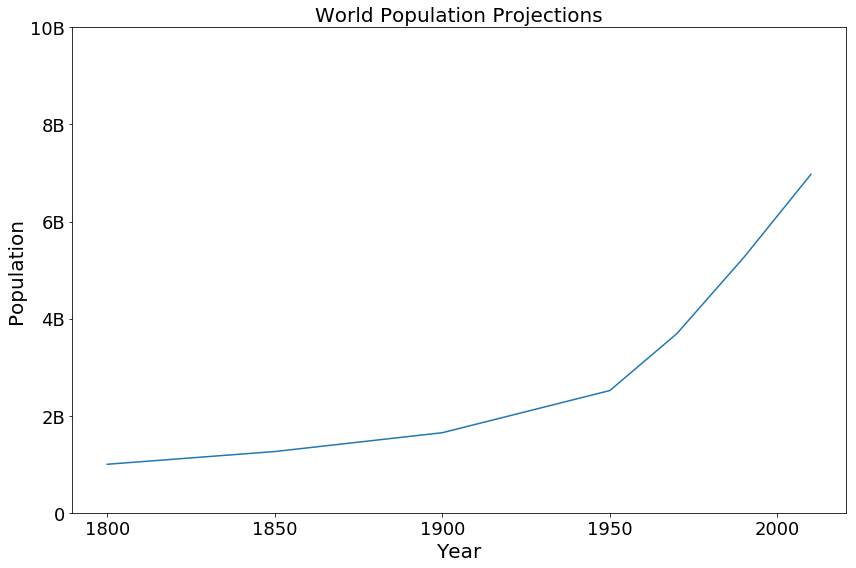

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

### this allows plots to appear directly in the notebook
%matplotlib inline

year = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]

year = [1800, 1850, 1900] + year
pop = [1.0, 1.262, 1.650] + pop

fig, axes = plt.subplots(figsize=(12,8))
plt.plot(year, pop)
         
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Projections', fontsize=20)
plt.yticks([0, 2, 4, 6, 8, 10], 
           ['0', '2B', '4B', '6B', '8B', '10B'])

plt.tight_layout()

Let's use the `pickle` module to retrieve two lists: one with GDP per capita and the other life expectancy for the the corresponding countries in the former list. Both lists are for the year 2007. 

In [13]:
import pickle

with open('gdp_cap', 'rb') as f:
     gdp_cap = pickle.load(f)
        
with open('life_exp', 'rb') as f:
     life_exp = pickle.load(f)
        

## 4.1 Scatter Plots
When you have a time scale along the horizontal axis, the line plot is your friend. But in many other cases, when you're trying to assess if there's a correlation between two variables, for example, the scatter plot is the better choice. Below is an example of how to build a scatter plot.

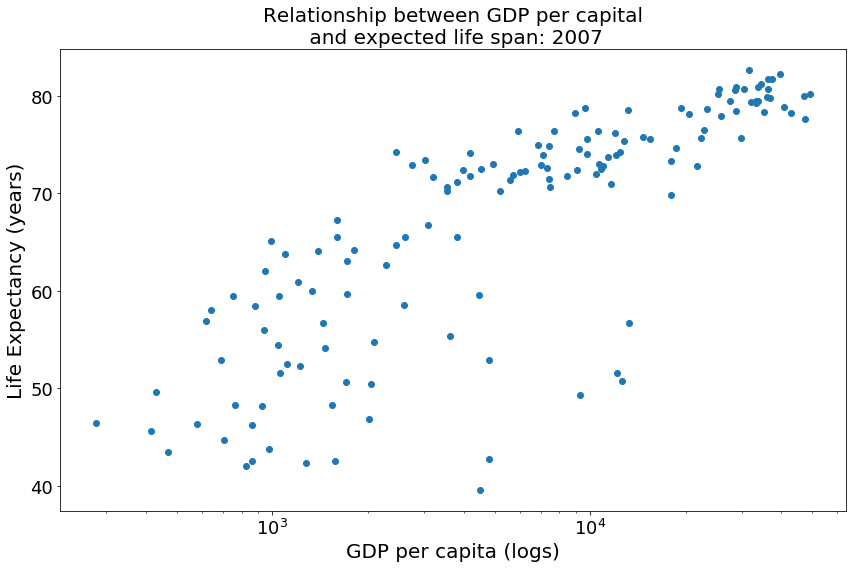

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

fig, axes = plt.subplots(figsize=(12,8))
plt.scatter(gdp_cap, life_exp)
plt.xlabel('GDP per capita (logs)')
plt.ylabel('Life Expectancy (years)')
plt.xscale('log')
plt.title('Relationship between GDP per capital\n and expected life span: 2007', fontsize=20)

plt.tight_layout()

## 4.2 Histogram

Histograms allow you to explore a dataset and get an **idea about the distribution**. 
Some key Histogram options are:
* *bins* (integer): # of bins or intervals
* *range* (tuple): min and max of the bins
* *normed* (boolean): whether to normalize to one
* *cumulative* (boolean): computes empirical CDF 

In [15]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of
        

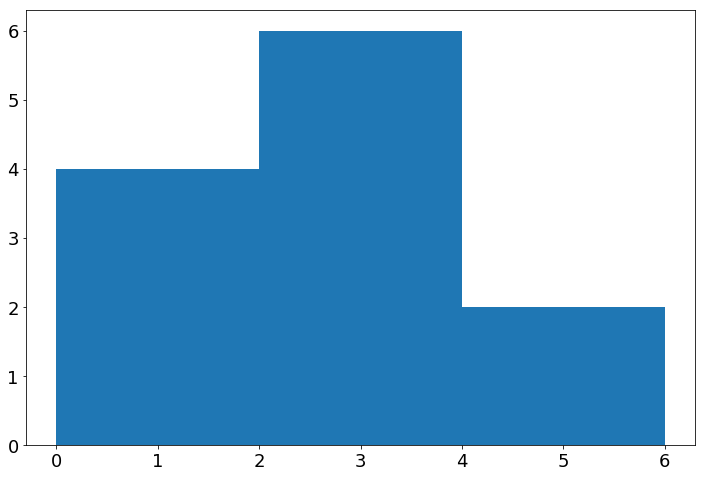

<Figure size 432x288 with 0 Axes>

In [16]:
values = [0, 0.6, 1.4, 1.6, 2.2, 2.5, 2.6, 3.2, 3.5, 3.9, 4.2, 6]

fig, axes = plt.subplots(figsize=(12,8))
plt.hist(values, bins=3)
plt.show()
plt.clf() # cleans up plot so you can start afresh

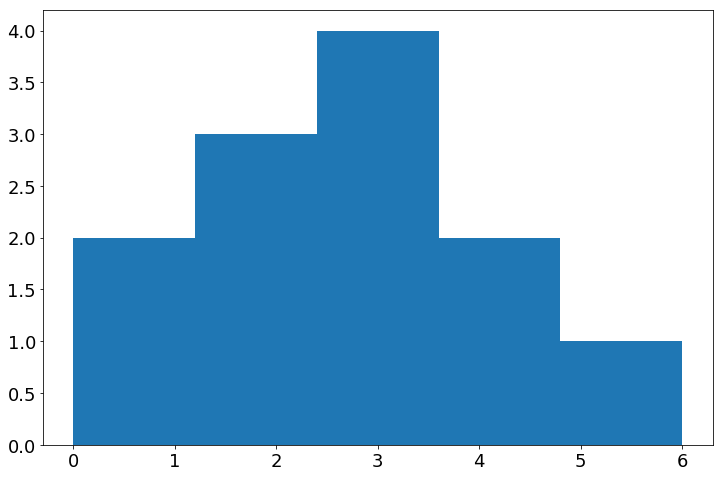

<Figure size 432x288 with 0 Axes>

In [17]:
fig, axes = plt.subplots(figsize=(12,8))
plt.hist(values, bins=5)
plt.show()
plt.clf()

## 4.3 Data Visualization
* Many options
    * Different plot types
    * Many customizations for each plot type!
* The choice depends on:
    * The data
    * The story you want to tell and describe. 
    
Below, I revisit the scatter plot from before and enhance the visualization!    

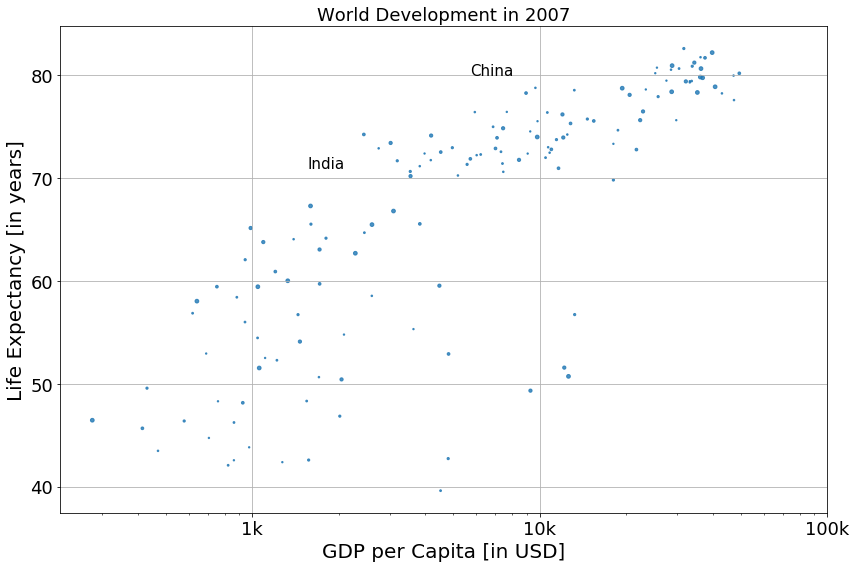

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

### this allows plots to appear directly in the notebook
%matplotlib inline

# 's': controls the "size" of the scatter plots, they are now set to 2*pop
# 'alpha': controls the opacity of the bubbles
fig, axes = plt.subplots(figsize=(12,8))
plt.scatter(gdp_cap, life_exp, s=np.array(pop)*2, alpha=0.8) 

plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007', fontsize=18)
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])

# Additional customizations
plt.text(1550, 71, 'India', fontsize=15)
plt.text(5700, 80, 'China', fontsize=15)

# Add grid() call
plt.grid(True)
plt.tight_layout()

# 5. Dictionaries

Dictionaries are another Python object type. The convention is something along the lines of:
`my_dict = {'key1': "value1", 'key2': "value2}`

In [19]:
world = {'afghanistan': 30.55, 'albania': 2.77, 'algeria': 39.21}
print(world['albania'])
print(world.keys())

2.77
dict_keys(['afghanistan', 'albania', 'algeria'])


## 5.1 Lists vs. Dictionaries

Both lists and dictionaries allow you to select, update, and remove elements using the `[]` operator. 

However, here are some key differences:
* `lists`: 
    * Indexed by a **range of numbers**.
    * Collection of values where **order matters**: can select entire subsets.

* `dictionaries`: 
    * Indexed by **unique keys**. 
    * Order doesn't matter: Can simply lookup values with **unique keys**.

# 6. Pandas

As a data scientist, you will encounter different types of datasets. A common structure across different datasets is going to be a **tabular structure**.

**Table 1:**

| temp     | measured_at | location     |
| :----:   |    :----:   |            :----: |
|   76     | 2016-01-01 14:00:01   | valve         |
|   86     | 2016-01-01 14:00:01   | compressor    |
|   72     | 2016-01-01 15:00:01   | valve         |
|   88     | 2016-01-01 15:00:01   | compressor    |
|   68     | 2016-01-01 16:00:01   | valve         |
|   78     | 2016-01-01 16:00:01   | compressor    |

In **Table 1** above, *rows=observations* and *columns=variables*. There are other examples of tables like this. 

In the end, you want some rectangular structure. A first-pass would be to use a 2-D NumPy array, but we have different data types!

We will use the `pandas` package, a high-level data manipulation tool built on `NumPy` and developed by [Wes McKinney](http://wesmckinney.com/). To use, you need: 
* <code><strong>import</strong> pandas <strong>as</strong> pd</code>

The key object types are `Series` and `DataFrames`, which have row and column index labels.
The `DataFrame` is one of Pandas' most important data structures: provides both a powerful and efficient way to store tabular data where you can label the rows and the columns.

### DataFrame from Dictionary
We can create a dataframe `df` object from a dictionary `dict` using commands like:
* `df = pd.DataFrame(dict)`

### DataFrame from CSV (comma-separated values)
We can create a dataframe `df` object from a csv file `filename.csv` using commands like:
* `df = pd.read_csv(filename.csv, index_col=0`)

where `index_col=0` tells the `read_csv` function to treat the first column of the `.csv` file as the row index labels.

### DataFrame from list of lists

We can built a `DataFrame` from a list of lists using the function `zip`, which is part of Python's standard library. The `zip()` function takes an iterable, makes an iterator that aggregates elements based on the iterables passed, and then returns an iterator of tuples. In other words, it creates a tuple based on element-wise matches between the iterables passed to `zip()`.

In [20]:
import pandas as pd

cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7, 12, 3, 5]
visitors = [139, 237, 326, 456]
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
list_labels = ['city', 'signups', 'visitors', 'weekday']
list_cols = [cities, signups, visitors, weekdays]

zipped = list(zip(list_labels, list_cols))
print(zipped, '\n')

data = dict(zipped)
users = pd.DataFrame(data)
print(users)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 3, 5]), ('visitors', [139, 237, 326, 456]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])] 

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


## 6.1 Indexing and Selection of Data

Square brackets work but only gives you limited functionality. Ideally, you want something to how elements in 2D `NumPy` arrays are selected.

In Pandas, you use the following:
* `loc` (label-based)
* `iloc` (integet position-based, starting at 0)


In [21]:
import pandas as pd

country = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
capital = ['Brasilia', 'Moscow', 'New Delhi', 'Beijing', 'Pretoria']
area = [8.516, 17.100, 3.286, 9.597, 1.221]
population = [200.40, 143.50, 1252.00, 1357.00, 52.98]
labels = ['BR', 'RU', 'IN', 'CH', 'SA']

data = {'':labels, 'country':country, 'capital':capital, 'area':area, 'population':population}
brics = pd.DataFrame.from_dict(data)
brics.set_index('', inplace=True, drop=True)

print(brics)
print()
print(type(brics.index))

         country    capital    area  population
                                               
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98

<class 'pandas.core.indexes.base.Index'>


The method `info` provides you with information about the `DataFrame` brics. For example, we can get the total number of non-missing (non-null) observations in a given column. 

In [22]:
brics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, BR to SA
Data columns (total 4 columns):
country       5 non-null object
capital       5 non-null object
area          5 non-null float64
population    5 non-null float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


A column in a `DataFrame` object is a `Series` object:

In [23]:
print(type(brics["country"]))

<class 'pandas.core.series.Series'>


When using the method `values` on a `Series`, we get a `Numpy` array object:

In [24]:
print(type(brics.country.values))

<class 'numpy.ndarray'>


Summarizing, it is **VERY IMPORTANT** to understand how `NumPy` and pandas work together in order to efficiently and effectively perform your desired computations.

### 6.1.1   Accessing using [ ]

**Note**: You can only select rows using square brackets if you specify a slice, like `0:4`. Also, you're using the integer indexes of the rows here, not the row labels!

In [25]:
### Column Access
print(brics['country'])
print(type(brics['country']))
print(brics[['country']])
print(type(brics[['country']]))
print(brics[['country', 'capital']])
print(type(brics[['country', 'capital']]))

### Row Access
brics[1:4]


BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object
<class 'pandas.core.series.Series'>
         country
                
BR        Brazil
RU        Russia
IN         India
CH         China
SA  South Africa
<class 'pandas.core.frame.DataFrame'>
         country    capital
                           
BR        Brazil   Brasilia
RU        Russia     Moscow
IN         India  New Delhi
CH         China    Beijing
SA  South Africa   Pretoria
<class 'pandas.core.frame.DataFrame'>


,country,capital,area,population
,,,,
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


### 6.1.2 Row Access `loc`

In [26]:
### Single brackets ---> Pandas 'Series' object 
brics.loc['RU']

country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object

In [27]:
### Single brackets ---> Pandas 'DataFrame' object 
brics.loc[['RU']]

,country,capital,area,population
,,,,
RU,Russia,Moscow,17.1,143.5


In [28]:
brics.loc[['RU', 'IN', 'CH']]

,country,capital,area,population
,,,,
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


### 6.1.3 Row and Column access with `loc`

In [29]:
brics.loc[['RU', 'IN', 'CH'], ['country', 'capital']]

,country,capital
,,
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


### 6.1.4 Column access with  `loc`

In [30]:
brics.loc[:, ['country', 'capital']]

,country,capital
,,
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


### 6.1.5 Row access with `iloc`

In [31]:
brics.iloc[[1,2,4]]

,country,capital,area,population
,,,,
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
SA,South Africa,Pretoria,1.221,52.98


### 6.1.6 Column access with `iloc`

In [32]:
### Selecting only columns
brics.iloc[:,[0,1]]

,country,capital
,,
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


# 7. Comparison Operators

Comparing objects only makes sense if they are of the same "type". The notable exceptions are:
* Comparing an `int` and `float`
* Comparing an `int` and `bool` (since boolean is a special kind of integer)
* Comparing a `float` and `bool` (since boolean is a special kind of integer)

## 7.1 Boolean Operators
The Boolean operators are `and`, `or`, and `not` for singleton booleans. 

In [33]:
print(True and True, '\n')
print(False and True, '\n')
print(True and False, '\n')
print(False and False, '\n')
print(not True, '\n')

True 

False 

False 

False 

False 



However, for `NumPy` arrays, we need to use:
* `np.logical_and()`
* `np.logical_or()`
* `np.logical_not()`

In [34]:
import numpy as np
my_house = np.array([18.0, 20.0, 10.75, 9.50])
your_house = np.array([14.0, 24.0, 14.25, 9.0])

### Which areas in "my_house" are greater than 18.5 or smaller than 10?
print(np.logical_or(my_house > 18.5, my_house < 10))

### Which areas are smaller than 11 in both "my_house" and "your_house"?
print(np.logical_and(my_house < 11, your_house < 11))

[False  True False  True]
[False False False  True]


# 8. Conditional Statements:  `if`, `elif`, and `else`

## 8.1 `if`
For a simple `if` statement, the general structure is:<br>

`if condition:`<br>
$\qquad$`expression`

The indentation is **key**: everything under the `if condition:` that is indented will execute *if* the condition is met. 

In [35]:
z = 4
if z%2==0:
    print("z is even")

z is even


## 8.2 `if` and `else`
For an `if` statement with *a mutually exclusive condition*, the general structure is:<br>

`if condition:`<br>
$\qquad$ `expression1` <br>
`else:`<br>
$\qquad$`expression2`

In [36]:
z = 5
if z%2==0:
    print("z is even")
else:
    print("z is odd")

z is odd


## 8.3 `if`, `elif` and  `else`
For an `if` statement with *more than one mutually exclusive condition*, the general structure is:<br>

`if condition1:`<br>
$\qquad$ `expression1` <br>
`elif condition2:`<br>
$\qquad$ `expression2` <br>
`else:` <br>
$\qquad$`expression3`

In [37]:
z = 3
if z%2==0:
    print("z is divisible by 2")
elif z%3==0:
    print("z is divisible by 3")
else:
    print("z is neither divisible by 2 or 3!")

z is divisible by 3


In [38]:
### Control Flow here only executes the 1st condition that is met, 
### even subsequent conditions could have been met. 
z = 6
if z%2==0:
    print("z is divisible by 2")
elif z%3==0:
    print("z is divisible by 3")
else:
    print("z is neither divisible by 2 or 3!")

z is divisible by 2


# 9. Filtering DataFrames

The problem below will combine comparison operators to filter a dataframe.

**Objective** Select countries from the `brics` dataframe with area over 8 (million) km<sup>2</sup>. This will involve the following steps:

1. Subset `brics` and select the column with the areas.
2. Compare the area column to the figure of interest (i.e. 8)
3. Use the results from 2. to select the countries.

In [39]:
### View the "brics" dataframe
print(brics)

         country    capital    area  population
                                               
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98


In [40]:
### Step 1:
brics["area"] # get a `Series` object, which is a column from the `DataFrame`


BR     8.516
RU    17.100
IN     3.286
CH     9.597
SA     1.221
Name: area, dtype: float64

In [41]:
### Step 2:
is_huge = brics["area"] > 8
print(is_huge)


BR     True
RU     True
IN    False
CH     True
SA    False
Name: area, dtype: bool


In [42]:
### Step 3:
brics[is_huge] # Within the column `area`, we only select the `rows` with boolean "True"

,country,capital,area,population
,,,,
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
CH,China,Beijing,9.597,1357.0


Recalling that pandas is built on `NumPy`, we can also use boolean opeators as follows:

In [43]:
import numpy as np

np.logical_and(brics["area"] > 8, brics["area"] > 8)


BR     True
RU     True
IN    False
CH     True
SA    False
Name: area, dtype: bool

In [44]:
brics[np.logical_and(brics["area"] > 8, brics["area"] > 8)]

,country,capital,area,population
,,,,
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
CH,China,Beijing,9.597,1357.0


# 10. The `while` loop 

The `while` loop is equivalent to a repeated `if` statement that executes commands as long as this statement remains true. If you want to repeat an action *until* a condition is met (e.g. estimating a given model's parameters until the "error" between some model- and empirical-implied moments is sufficiently low), then a `while` loop can help achieve this.

The general structure is:<br>

`while condition:`<br>
$\qquad$ `expression` <br>

The example below illustrates a great use of a `while` loop:

In [45]:
### Example 1:
error = 50.0
while error > 1:
    error = error/4
    print(error)

12.5
3.125
0.78125


**Note:** A `while` should have terminate at some point!

In [46]:
### Example 2:
offset = -6 # Initialize offset

# Code the while loop
while offset != 0 :
    print("correcting...")
    if offset > 0:
        offset -= 1
    else:
        offset += 1
    print(offset)

correcting...
-5
correcting...
-4
correcting...
-3
correcting...
-2
correcting...
-1
correcting...
0


# 11. The `for` loop

## 11.1 Overview

The general structure is:<br>

`for var in seq:`<br>
$\qquad$ `expression` <br>

which can be translated in pseudo-code to "*for each **var** in **seq**, execute expression"*

The example below illustrates a great implementation of a `for` loop:

In [47]:
fam = [1.73, 1.68, 1.71, 1.89]
for height in fam:
    print(height)

1.73
1.68
1.71
1.89


`enumerate` allows us to also retrieve the index associated with a value in a list:

In [48]:
for index, height in enumerate(fam):
    print("index " + str(index) + ": " + str(height))

index 0: 1.73
index 1: 1.68
index 2: 1.71
index 3: 1.89


In [49]:
for c in "family":
    print(c.upper())

F
A
M
I
L
Y


## 11.2 Looping over Data Structures


### Dictionaries:
To access *both* the keys and values in a dictionary, we have to use the `items()` method for a dictionary. The `items()` method returns a view object that displays a list of a given dictionary's (key, value) tuple pair.

It is worth reminding ourselves that dictionaries are *inherently unordered!*

In [50]:
world = {"afghanistan": 30.55, 
         "albania": 2.77,
         "algeria": 39.21}

for key, value in world.items():
    print(key + " -- " + str(value))

afghanistan -- 30.55
albania -- 2.77
algeria -- 39.21


### NumPy Arrays:

Looping over values in a 1D `numpy` array is quite simple:

In [51]:
import numpy as np

np_height = np.array([1.73, 1.68, 1.71, 1.89, 1.79])
np_weight = np.array([65.4, 59.2, 63.6, 88.4, 68.7])
bmi = np_weight/(np_height**2)

for value in bmi:
    print(value)

21.85171572722109
20.97505668934241
21.750282138093777
24.74734749867025
21.44127836209856


Looping over values in a 2D `numpy` array is more involved. If you want to loop over **EVERY** element in the multidimensional array, we use the function `nditer`:

In [52]:
measures = np.array([np_height, np_weight])

for value in np.nditer(measures):
    print(value)

1.73
1.68
1.71
1.89
1.79
65.4
59.2
63.6
88.4
68.7


### Pandas DataFrames

To loop over rows, we need to use the method `iterrows`. The example below illustrates how we can use a `for` loop to add a new column to a dataframe, albeit in an inefficient manner! The addition of this new column is an example of **broadcasting** in Python.

In [53]:
import pandas as pd

### row will be a pandas `Series` object:
for label, row in brics.iterrows():
    brics.loc[label, "name_length"] = len(row["country"])
print(brics)    

         country    capital    area  population  name_length
                                                            
BR        Brazil   Brasilia   8.516      200.40          6.0
RU        Russia     Moscow  17.100      143.50          6.0
IN         India  New Delhi   3.286     1252.00          5.0
CH         China    Beijing   9.597     1357.00          5.0
SA  South Africa   Pretoria   1.221       52.98         12.0


A more efficient approach is to use the `apply` function:

In [54]:
brics["name_length"] = brics["country"].apply(len)
print(brics)

         country    capital    area  population  name_length
                                                            
BR        Brazil   Brasilia   8.516      200.40            6
RU        Russia     Moscow  17.100      143.50            6
IN         India  New Delhi   3.286     1252.00            5
CH         China    Beijing   9.597     1357.00            5
SA  South Africa   Pretoria   1.221       52.98           12


In [55]:
brics["COUNTRY"] = brics["country"].apply(str.upper)
print(brics)

         country    capital    area  population  name_length       COUNTRY
                                                                          
BR        Brazil   Brasilia   8.516      200.40            6        BRAZIL
RU        Russia     Moscow  17.100      143.50            6        RUSSIA
IN         India  New Delhi   3.286     1252.00            5         INDIA
CH         China    Beijing   9.597     1357.00            5         CHINA
SA  South Africa   Pretoria   1.221       52.98           12  SOUTH AFRICA


# 12. Importing, Exporting, and Plotting with pandas and DataFrames

## 12.1 Importing and Exporting

In [56]:
### Read the raw file as-is: df1
file_messy = 'messy_stock_data.csv'
file_clean = 'tmp_clean_stock_data.csv'
df1 = pd.read_csv(file_messy)
print(df1.head(), '\n')

### Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

### Print the output of df2.head()
print(df2.head(), '\n')

### Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

### Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                         

     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  

## 12.2 Plotting 

Index(['Temperature', 'DewPoint', 'Pressure', 'Date'], dtype='object')


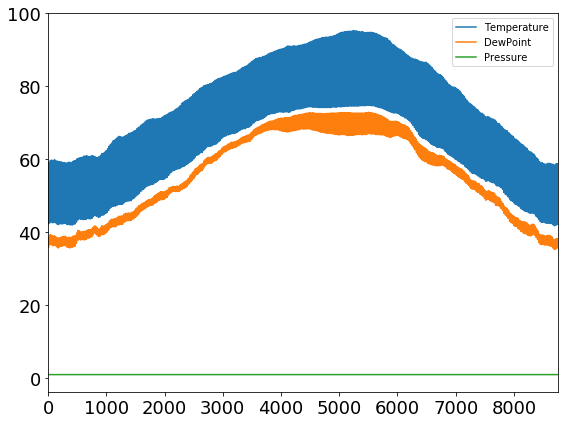

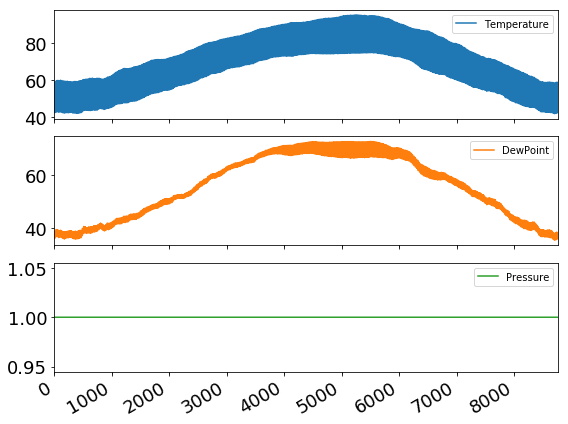

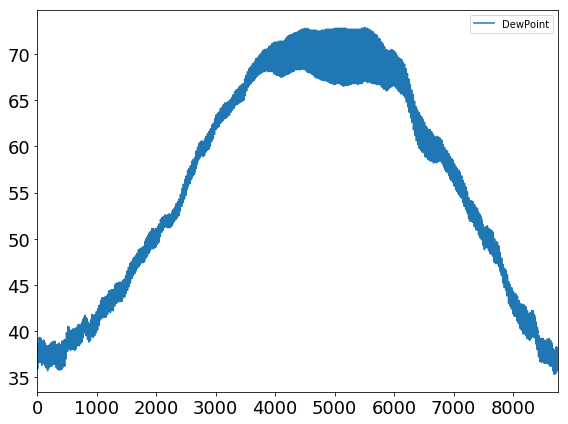

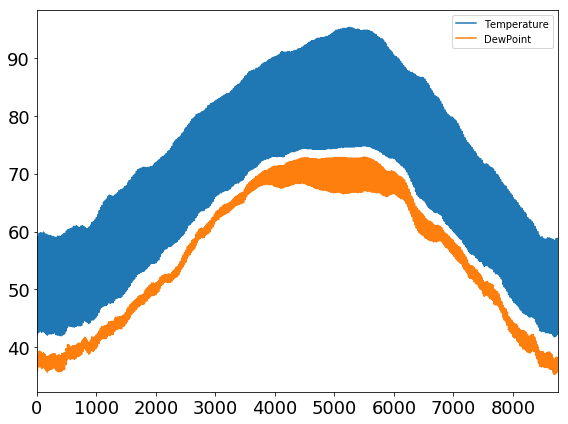

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

df = pd.read_csv('weather_data_austin_2010.csv')
print(df.columns)

### Plot all columns (default)
df.plot(figsize=(8,6))
plt.tight_layout()

### Plot all columns as subplots
df.plot(subplots=True, figsize=(8,6))
plt.tight_layout()

### Plot just the Dew Point data
column_list1 = ['DewPoint']
df[column_list1].plot(figsize=(8,6))
plt.tight_layout()

### Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].plot(figsize=(8,6))
plt.tight_layout()

**Note** There can be different ways to "code" up the same plot of interest. For example, let's say you have a DataFrame called `df_main`, then if you wanted to plot a histogram, you could use the following three ways:

1. <code>df_main.plot(kind='hist')</code>
2. <code>df_main.plt.hist()</code>
3. <code>df_main.hist()</code>

These variations also work for **scatter**, **box**, etc.

## 12.3 pandas Scatter Plots

Let's plot fuel efficiency (miles-per-gallon) vs. horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG):

    mpg  cylinders  displacement  horse power  weight  acceleration  \
0  18.0          8         307.0        130.0    3504          12.0   
1  15.0          8         350.0        165.0    3693          11.5   
2  18.0          8         318.0        150.0    3436          11.0   
3  16.0          8         304.0        150.0    3433          12.0   
4  17.0          8         302.0        140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


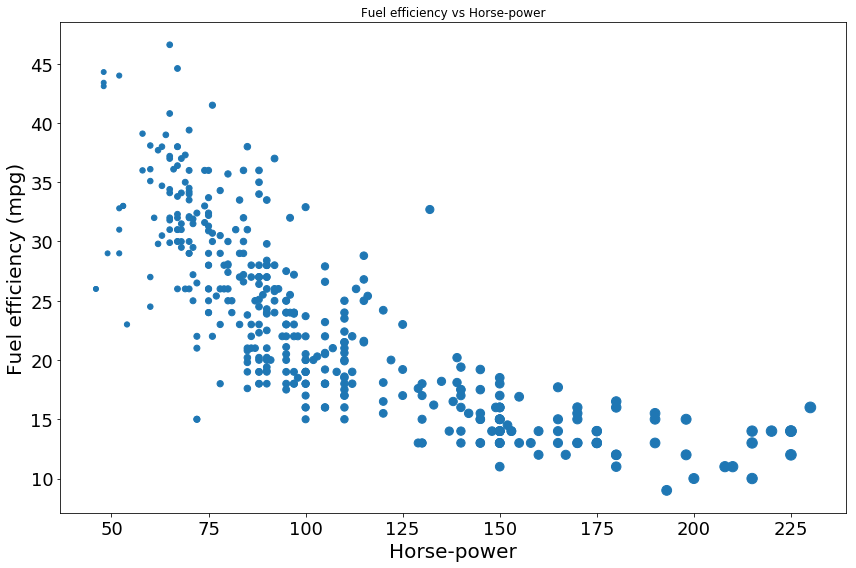

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### this allows plots to appear directly in the notebook
%matplotlib inline

df = pd.read_csv('auto-mpg.csv')
print(df.head())

df.plot(kind='scatter', x='horse power',y='mpg', s=np.array(df['horse power'])*0.5, figsize=(12,8))
plt.title('Fuel efficiency vs Horse-power')
plt.xlabel('Horse-power')
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.tight_layout()

## 12.4 pandas Box Plots

Now, we will create box plots for fuel efficiency (`mpg`) and `weight`. This can be done in a single figure by setting `subplots`=`True` inside `.plot()` to generate two separate plots.

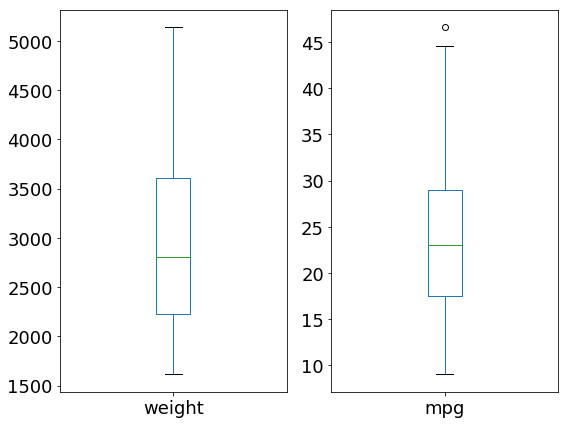

In [59]:
### Generate the box plots
df[['weight', 'mpg']].plot(kind='box', subplots=True, figsize=(8,6))

### Display the plot
plt.tight_layout()

## 12.5 pandas `hist`, `pdf`, and `cdf`

The `hist()` method is also great for generating empirical probability density functions (PDFs) and cumulative density functions (CDFs). Let's plot the empirical PDF and CDF for the variable `weight` from before:

In [60]:
df.weight.describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

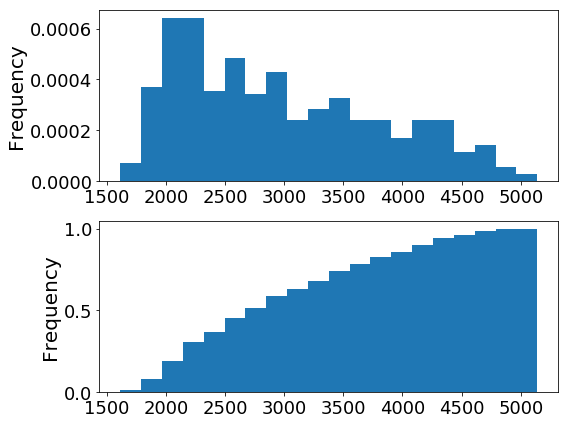

In [61]:
### Format the plots so they appear in 1 column, 2 rows
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

### Plot the PDF
df.weight.plot(ax=axes[0], kind='hist', density=True, bins=20)

### Plot the CDF
df.weight.plot(ax=axes[1], kind='hist', density=True, cumulative=True, bins=20)

plt.tight_layout()

# 13. Simulating a Random Walk 

We can now tie together the aforementioned concepts with an involved exercise.:

**Setup:** You and a friend are next to the Empire State Building. You through a fair dice 100x. 
* If the dice $\in \{1,2\}$, you go *one step down* the Empire State Building
* Else if the dice $\in \{3,4,5\}$, you go *one step up* the Empire State Building
* Else, you roll the dice again and walk up the *# of steps* that coincide with this 2<sup>nd</sup> roll.

**Assumptions:**
* You can't go below step 0.
* You have a 0.1% chance of falling down the stairs when you make a move. If you fall, you have to start again from step 0.

**Question** You bet your colleague you will reach *at least* 60 steps. What is the chance of you winning this bet?

To answer this question, we will simulate the process implied by the game above. This requires a *random number generator*. The sub-package `random` in `numpy` is perfect for this. A few important functions are:

* `seed()`: sets the random seed, so results can be replicated between simulations
* `rand()`: unless explictly specified, generates a random float between 0 and 1.
* `randint()`: unless explictly specified, generates 0 or 1. The "upper bound" is exclusive.

In [62]:
import numpy as np

### Coin Toss
np.random.seed(123)
coin = np.random.randint(0,2) # Randomly generates 0 or 1
print(coin)
if coin==0:
    print("heads")
else:
    print("tails")

0
heads


## 13.1 Random Walk: using a fair coin

The code below provides a simple example of how to construct a random walk from a fair, two-sided coin. 

In [63]:
import numpy as np

np.random.seed(123)
tails = [0]
for x in range(10):
    coin = np.random.randint(0,2)
    tails.append(tails[x] + coin)

print(tails)    

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


Back to our original **Question**...
### 13.2 Random Walk: fair dice + step gamble
Inside the `for` loop, we include the restrictions on how we move along steps. We also make sure to restrict the "process" so that it is not allowed to move below step 0 (i.e. no negative steps). 

We only consider "one run" of the process for 100 steps. 

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60, 64, 63, 62, 64, 63, 64]


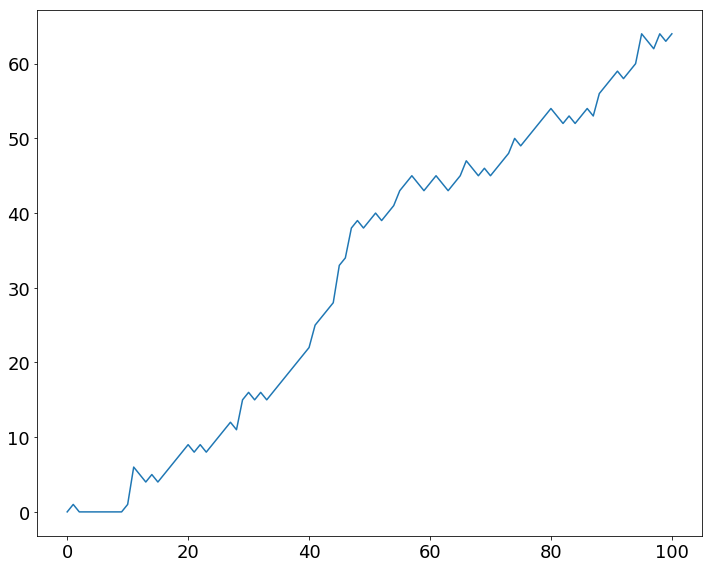

In [64]:
### Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = max(step - 1,0)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)


### Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

### Plot random_walk
fig, axes = plt.subplots(figsize=(10,8))
plt.plot(random_walk)

### Show the plot
plt.tight_layout()

## 13.3 Distribution of Random Walks

Our main **question** is: What is the probability we reach at least 60 steps in the Empire State Building? This can be solved for obtaining an empirical estimate of the **distribution** of this random walk. 

Each random walk will have an end point. We can simulate this endpoint 10,000 times, giving us 10,000 end points and a "distribution." With this distribution, we can calculate chances. 

### 13.3.1 Simulating 10,000 Runs of a Random Walk (Coin Flip)

By simulating a random walk generated by consecutive coin flips, and increasing the number of simulations, we can estimate the "theoretical" distribution of the random walk.

Below we augment the code from before with an "outer" `for` loop that simulates the coin flip random walk process 10,000 times.

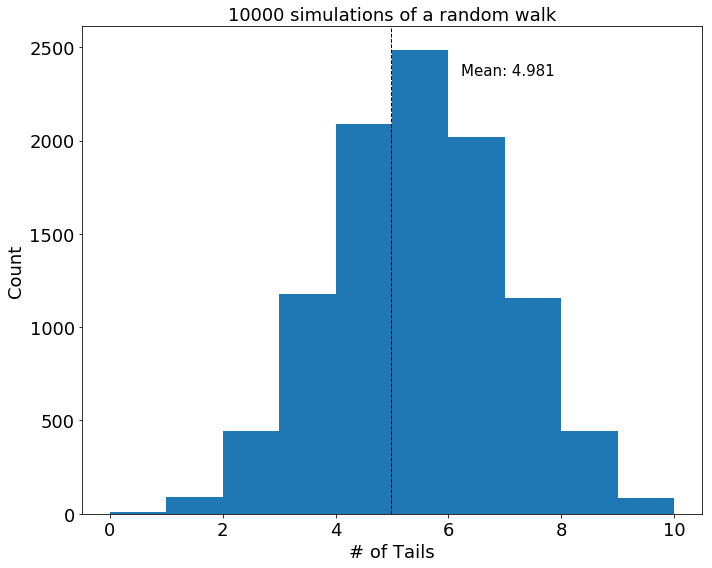

In [65]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
final_tails = []
for r in range(10000):
    
    tails = [0] # Start at 0 for each new "r"
    for x in range(10):
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)     
    final_tails.append(tails[-1])    
    
fig, axes = plt.subplots(figsize=(10,8))    
plt.hist(final_tails, bins=10)  
plt.xlabel("# of Tails", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title(str(len(range(10000))) + " simulations of a random walk", fontsize=18)
plt.axvline(np.asarray(final_tails).mean(), color='k', linestyle='dashed', linewidth=1) # Show the mean

_, max_ = plt.ylim()
plt.text(np.asarray(final_tails).mean() + np.asarray(final_tails).mean()/4, 
         max_ - max_/10, 
        'Mean: {:.3f}'.format(np.asarray(final_tails).mean()), fontsize=15)

plt.tight_layout()

### 13.3.2 Simulating 10,000 Runs of a Random Walk: fair dice + step gamble

Below we augment the code from the **problem of interest** so that we simulate the step "process" 10,000 times. 

In addition, we also need to add the 2<sup>nd</sup> restriction: you have a 0.1% chance of falling down the stairs when you make a move. If you fall, you have to start again from step 0.

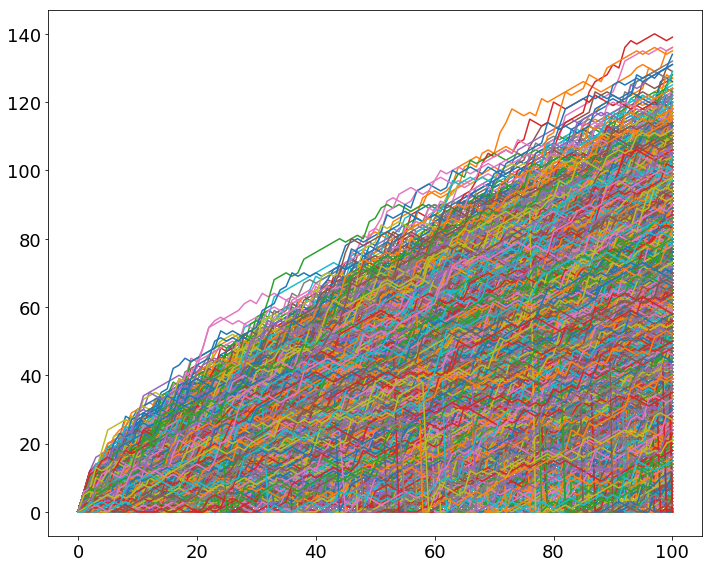

In [66]:
import numpy as np

np.random.seed(123)

### Initialize all_walks (don't change this line)
all_walks = []

### Simulate random walk 10000 times
for i in range(10000):
    
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
            
        ### Implement clumsiness by generating a random number X~Unif[0,1]     
        if np.random.rand(1,1) <= 0.001:
            step = 0
            
        random_walk.append(step)
    
    all_walks.append(random_walk) # Append random_walk to all_walks

    
### Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks)) 
fig, axes = plt.subplots(figsize=(10,8)) 
plt.plot(np_aw_t)
plt.tight_layout()

**Plotting the distribution:** We still have to solve the question: **What are the odds that you'll reach 60 steps high on the Empire State Building?**

You need to know the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.

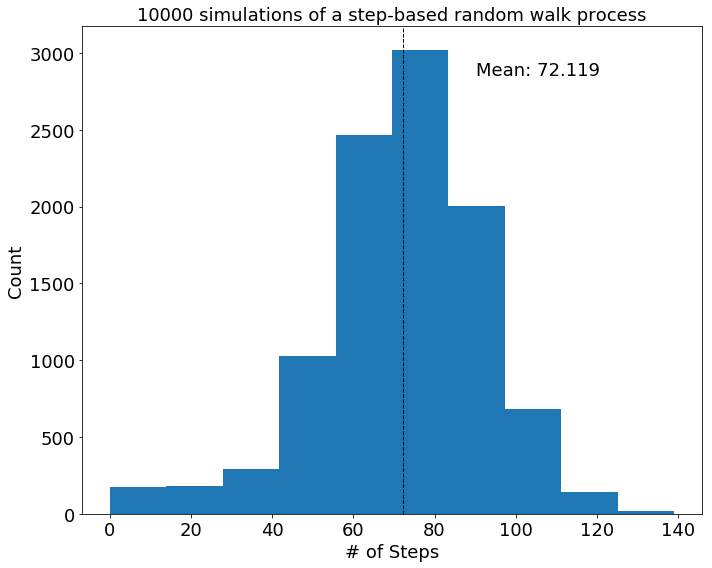

In [67]:
### Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

fig, axes = plt.subplots(figsize=(10,8)) 
plt.hist(ends, bins=10)  
plt.xlabel("# of Steps", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title(str(len(range(10000))) + " simulations of a step-based random walk process", fontsize=18)
plt.axvline(ends.mean(), color='k', linestyle='dashed', linewidth=1) # Show the mean

_, max_ = plt.ylim()
plt.text(ends.mean() + ends.mean()/4, 
         max_ - max_/10, 
        'Mean: {:.3f}'.format(ends.mean()), fontsize=18)
plt.tight_layout()

To calculate the chance we reach at least 60 steps, we count the number of integers in ends that are **greater than or equal to 60** and divide that number by the # of simulations (i.e. 10,000), the total number of simulations:

In [68]:
atleast60steps = (ends >= 60)
P_atleast60steps= sum(atleast60steps)/10000
print("Pr[We reach AT LEAST 60 steps] = ", P_atleast60steps)

Pr[We reach AT LEAST 60 steps] =  0.7814


# 14. Debugging

## 14.1 Overview

Debugging Python code in Jupyter notebooks is simple. Consider the following example, which contains a "runtime" error on purpose:

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

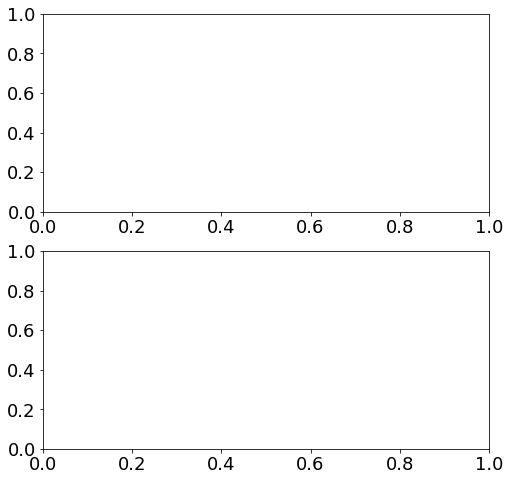

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### This function plots the square of the positive part of the function f(x) = x^2 over interval [0,10]
def plot_squared():
    fig, axes = plt.subplots(2, 1, figsize=(8,8))
    x = np.linspace(0, 10, 10)
    axes.plot(x, x**2)
    plt.tight_layout()
    
plot_squared()   

Where does the error occur? The traceback shows the error takes place at the method call `ax.plot(x, x**2)`. 

Given the error is found within the definition of our function `plot_squared()`, we can make use of Jupyter's debugging feature by typing the following cell block `%debug`. 

`%debug` is an IPython *line* magic variable. A *cell* magic has two % symbols, while a *line* magic has one % symbol and no argument. 

> <ipython-input-69-7f6fabd83d74>(9)plot_squared()
      7     fig, axes = plt.subplots(2, 1, figsize=(8,8))
      8     x = np.linspace(0, 10, 10)
----> 9     axes.plot(x, x**2)
     10     plt.tight_layout()
     11 

ipdb> axes
array([<matplotlib.axes._subplots.AxesSubplot object at 0x116276ba8>,
      dtype=object)
ipdb> q


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

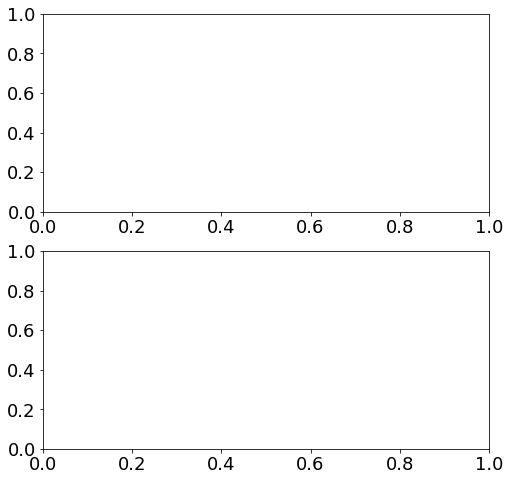

In [70]:
%debug

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### This function plots the square of the positive part of the function f(x) = x^2 over interval [0,10]
def plot_squared():
    fig, axes = plt.subplots(2, 1, figsize=(8,8))
    x = np.linspace(0, 10, 10)
    axes.plot(x, x**2)
    plt.tight_layout()
    
plot_squared()   

The prompt `ipdb>` allows you to check where the error may exist within your code. Specifically, you can inspect the object `axes` where the error shows up. We can type the name `axes` inside the prompt in order to inspect the issues with this object. 

For this case, we will see that `axes` is not a `Numpy` array, but a regular array, which doesnt have the method `plot().` To exit the interactive prompt, enter `q`.

The corrected code is below:

> <ipython-input-70-ce237e9d570b>(11)plot_squared()
      9     fig, axes = plt.subplots(2, 1, figsize=(8,8))
     10     x = np.linspace(0, 10, 10)
---> 11     axes.plot(x, x**2)
     12     plt.tight_layout()
     13 

ipdb> axes
array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c960c88>,
      dtype=object)
ipdb> axes
array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c960c88>,
      dtype=object)
ipdb> p
*** SyntaxError: unexpected EOF while parsing
ipdb> q


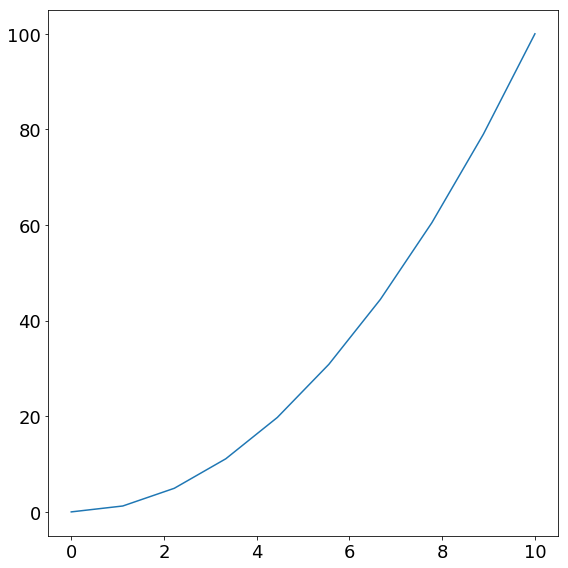

In [71]:
%debug

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### This function plots the square of the positive part of the function f(x) = x^2 over interval [0,10]
def plot_squared():
    fig, axes = plt.subplots(1, 1, figsize=(8,8))
    x = np.linspace(0, 10, 10)
    axes.plot(x, x**2)
    plt.tight_layout()
    
plot_squared()   

Supposed you wanted to "step through" code using **breakpoints**, then you can set a breakpoint by simply using the `breakpoint()` function or by importing the built-in module `pdb`, you can use `pdb.set_trace()` exactly where you want to start debugging. 

We can step forward one line at a time by entering `n` into the prompt `(Pdb)`. As before, quitting the debugger just requires that we enter `q`. Two cheatsheets containing other commands associated with how to navigate the Python debugger can be found [here](https://kapeli.com/cheat_sheets/Python_Debugger.docset/Contents/Resources/Documents/index) and [here](https://appletree.or.kr/quick_reference_cards/Python/Python%20Debugger%20Cheatsheet.pdf).

> <ipython-input-72-b6ff2be3ab2c>(7)plot_squared()
-> fig, axes = plt.subplots(1, 1, figsize=(8,8))
(Pdb) axes
(Pdb) n
> <ipython-input-72-b6ff2be3ab2c>(8)plot_squared()
-> x = np.linspace(0, 10, 10)
(Pdb) n
> <ipython-input-72-b6ff2be3ab2c>(9)plot_squared()
-> axes.plot(x, x**2)
(Pdb) q


BdbQuit: 

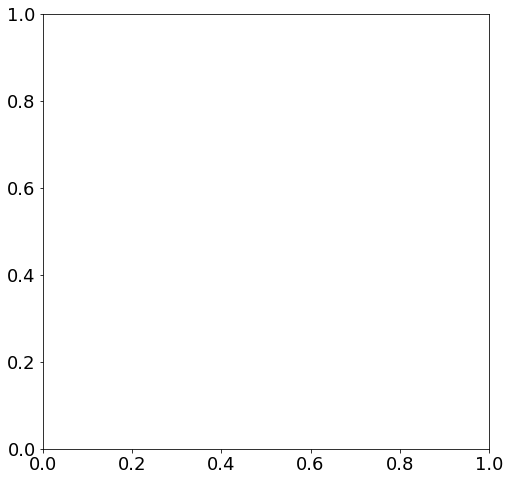

In [72]:
import pdb

### This function plots the square of the positive part of the function f(x) = x^2 over interval [0,10]
def plot_squared():
    #breakpoint() ### BREAKPOINT IS SET HERE!
    pdb.set_trace()
    fig, axes = plt.subplots(1, 1, figsize=(8,8))
    x = np.linspace(0, 10, 10)
    axes.plot(x, x**2)
    plt.tight_layout()
    
plot_squared()   

## 14.2 An Even Better Way to Debug: PixieDebugger

**PixieDebugger** is a visual Python debugger built as part of the Python package [`pixiedust`](https://github.com/pixiedust/pixiedust/wiki/Tutorial:-Using-Notebooks-with-PixieDust-for-Fast,-Flexible,-and-Easier-Data-Analysis-and-Experimentation). 

**PixieDebugger** includes a source editor, local variable inspector, console output, the ability to evaluate Python expressions in the current context, breakpoints management, as well as a toolbar for controlling code execution.

To install from a Jupyter notebook, execute the code `!pip install pixiedust` and import as `pixiedust`. To invoke it within a cell, use the magic `%%pixie_debugger`. 

This [link](https://medium.com/ibm-watson-data-lab/the-visual-python-de) provides a detailed overview for how **PixieDebugger** may be implemented. 

The same lines of code from before can be easily debugged using the *cell* magic `%%pixie_debugger`. This second method is my preferred choice for debugging in a Jupyter notebook!

In [73]:
### import the 'pixisdust' module
import pixiedust

Pixiedust database opened successfully


Table USER_PREFERENCES created successfully
Table service_connections created successfully
Unable to check latest version <urlopen error _ssl.c:1039: The handshake operation timed out>


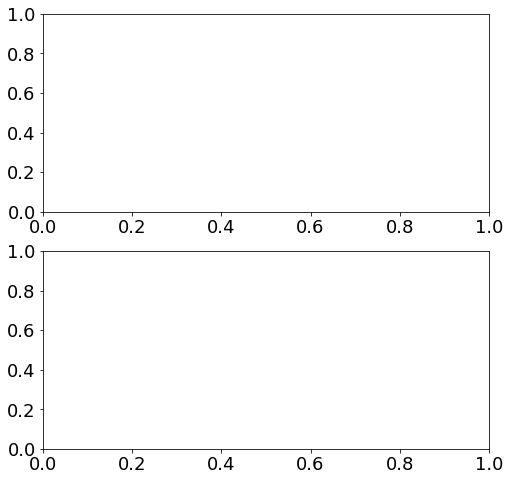

In [74]:
%%pixie_debugger
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### This function plots the square of the positive part of the function f(x) = x^2 over interval [0,10]
def plot_squared():
    fig, axes = plt.subplots(2, 1, figsize=(8,8))
    x = np.linspace(0, 10, 10)
    axes.plot(x, x**2)
    plt.tight_layout()
    
plot_squared()   

If we wanted to stop somewhere in the code above, we can use the visual breakpoints (i.e. 🐞). All we have to do is hover over a line number on the gutter (shown above on the left) to make the red bug icon appear and clicking it to move the code execution to the line of interest. 

Alternatively, we can use the `-b` argument switch and specify a list of breakpoints separated by a space. These breakpoints can be a method/function/variable name (such as `plot_squared`) or an explicit line number (*you need to show line numbers in your cell*)

In [75]:
%%pixie_debugger -b plot_squared 8
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### This function plots the square of the positive part of the function f(x) = x^2 over interval [0,10]
def plot_squared():
    fig, axes = plt.subplots(2, 1, figsize=(8,8))
    x = np.linspace(0, 10, 10)
    axes.plot(x, x**2)
    plt.tight_layout()
    
plot_squared()   

To invoke PixieDebugger after an exception has happened (i.e. post-mortem), simply use the *line* magic `%debugger`

In [76]:
%pixie_debugger